/home/ekrem/Ekrem/chandrasekhar_solver.py:16: RuntimeWarning: invalid value encountered in double_scalars
  dydt = [y[1] , (-2/t)*y[1] - (y[0]**2 - (1/y_c**2))**(3/2)]


[0.06909274 0.32918963 0.88427089 1.22537668 1.30425708 1.31539039
 1.31689149 1.31783268 1.31784621 1.31784757 1.31784771 1.31784772
 1.31784772 1.31784772 1.31784772]
difference between two last mass values:  -8.881784197001252e-16
Chandrasekhar Mass is :  1.317847720348232 (in solar mass)


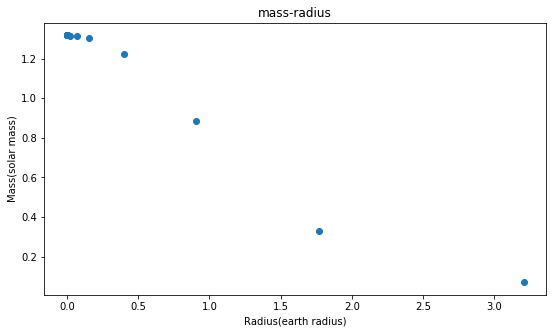

In [9]:
import numpy as np
import chandrasekhar_solver as ch
import Functions as F
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

### DATA ### 
M,logg = F.data_reader()
M,R = F.scaler(M,logg)

D = 1830000000 #found
rho_c = [1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15, 1e16, 1e17, 1e18, 1e19, 1e24, 1e25, 1e26]

### CONSTANTS(SI) ###
K = 3097671.1345466143 #found before
G = 6.67408e-11
solar_mass = 1.988e30 #kg
earth_radius = 6.371e6 #m

zeta_n = 0 ## when the solution reaches surface value.
zeta_prime_n = 0 ## when the derivative reaches the surface
Radius = 0
Mass = 0
R_new = [] ## for storing new radius and mass
M_new = []
C = 5.165215436316856e+21 #found
for rho in rho_c:
    ### solve the chandrasekhar for given rho and D ###
    sol,surface = ch.solve_chan(D,rho,limit=8.2,met='RK45')
    ##### find the surface #####
    for j in range(len(sol.t)):
        if (sol.y[0,j] <= surface):
            zeta_n = sol.t[j]
            zeta_prime_n = sol.y[1,j]
        elif(sol.y[0,-1]> surface):
            zeta_n = sol.t[-1]
            zeta_prime_n = sol.y[1,-1]
    ### For Radius ###
    y_c = np.sqrt(rho/D + 1)
    Beta = np.sqrt((2*C)/(np.pi*G))/(D*y_c) ## scale factor of radius
    Radius = (Beta*zeta_n)
    ### For Mass ###
    Mass = 4*np.pi*(Radius**3)*D*(y_c**3)*(-zeta_prime_n/zeta_n)
    Mass = Mass/solar_mass
    Radius = Radius/earth_radius
    ## add them to array
    R_new.append(Radius)
    M_new.append(Mass)
R_new = np.array(R_new)
M_new = np.array(M_new)
fig, axis = plt.subplots(figsize = (9,5))
plt.plot(R_new,M_new,'o')
plt.title("mass-radius")
plt.xlabel("Radius(earth radius)")
plt.ylabel("Mass(solar mass)")
print(M_new)
print("difference between two last mass values: ", M_new[-1]-M_new[-2])
print("Chandrasekhar Mass is : ",M_new[-1],"(in solar mass)")
